<a href="https://colab.research.google.com/github/protechanalysis/US-Power-Generation-Analysis/blob/main/eda_us_power.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction**

The objective of this exploratory data analysis (EDA) is to gain insights into the trends of power generation in the United States from 2001-2021, with a focus on renewable. I aim to analyze the datasets, which include information on power generation across different states, types of producers, and energy sources. The primary questions I seek to answer are:

##### **1. Temporal Trends:**

-   How has the overall power generation evolved over the years?
-   How has the overall renewable power generation evolved over the years? In comparison to nonrenewable power generation?

##### **2. Energy Type Comparison:**

-   what is the total generation of different types of renewable energy sources?
-   How does the contribution of different types of renewable energy sources vary over time? Are certain types of energy sources gaining prominence compared to others?

##### **3. Producer Sector Analysis:**

-   What is the total energy generated by the type of producer? Is there any noticeable trend?
-   What is the sub-sector noticeable trend for the major type of producer?

##### **4. State-wise Analysis:**

-   Top 5 states in renewable generation?
-   What are the trends in renewable power generation for each of the top states? Are there states that stand out in terms of consistent growth or fluctuations?
-   What is the major renewable generation source for each of the top states?

### **Data Source**

The dataset was downloaded from kaggle in CSV file format


### **Data Cleaning and exploration**



In [3]:
# Load required libraries
library(tidyverse)

In [4]:
# Load data files
gen_load <- read_csv("/content/drive/MyDrive/us power/organised_Gen.csv")
state <- read_csv("/content/drive/MyDrive/us power/states.csv") %>% select(State, Code)

Rows: 496774 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): STATE, TYPE OF PRODUCER, ENERGY SOURCE
dbl (4): YEAR, MONTH, DAY, GENERATION (Megawatthours)

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 51 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): State, Abbrev, Code

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:

# Join state data with energy generation data and exclude STATE column
gen <- gen_load %>% inner_join(state, by = c("STATE" = "Code")) %>%
  select(-STATE)

In [6]:
# Check for missing values in the generated dataset
colSums(is.na(gen))

YEAR                      MONTH 
                         0                          0 
                       DAY           TYPE OF PRODUCER 
                         0                          0 
             ENERGY SOURCE GENERATION (Megawatthours) 
                         0                          0 
                     State 
                         0

In [7]:
# Rename columns for clarity
gen_rename <- gen %>%
  rename(
    "TYPE_OF_PRODUCER" = trimws("TYPE OF PRODUCER"),
    "ENERGY_SOURCE" = trimws("ENERGY SOURCE"),
    "GENERATION_Megawatthours" = trimws("GENERATION (Megawatthours)"))

In [8]:
# Filter out total values for each type of producer
gen_filter <- gen_rename %>%
  filter(!grepl("^Total.*", TYPE_OF_PRODUCER))

# Filter out 'Total' from the Energy source column
gen_filter_source <- gen_filter %>% filter(ENERGY_SOURCE != "Total")


In [9]:
# Generate a summary of generation by energy source
gen_filter_source %>% group_by(ENERGY_SOURCE) %>%
  summarize(
    Min = min(GENERATION_Megawatthours),
    Mean_gen = mean(GENERATION_Megawatthours),
    `1st_quantile` = quantile(GENERATION_Megawatthours, probs = 0.25),
    Median = quantile(GENERATION_Megawatthours, probs = 0.50),
    `3rd_quantile` = quantile(GENERATION_Megawatthours, probs = 0.75),
    Max = max(GENERATION_Megawatthours))

ENERGY_SOURCE,Min,Mean_gen,1st_quantile,Median,3rd_quantile,Max
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Coal,-8037.0,1001470.19,5358.0000,57676.000,1121067.00,12992757
Geothermal,-140.0,165917.63,10080.5000,20622.000,97341.50,1085778
Hydroelectric Conventional,-2271.0,230900.63,2448.0000,24506.830,124418.40,11182501
Natural Gas,-6092.9,444700.23,4289.6975,36007.000,329290.50,18305637
Nuclear,-29677.0,2075090.80,863474.0000,1511230.500,2851507.25,8883354
Other,-16861.0,11844.51,48.2500,3413.190,11234.75,319159
Other Biomass,-999.0,12001.46,699.0750,3057.000,10188.02,212451
Other Gases,-655.0,26558.49,1.0000,2180.000,24444.50,413354
Petroleum,-26541.0,22842.15,14.0000,429.000,5218.69,5054796


In [10]:
 #Split 'type of producer' into 'producer' and 'company'
producer_split <- gen_filter_source %>% mutate(
  energy_producer = word(TYPE_OF_PRODUCER, 1, sep = ", "),
  energy_company = word(TYPE_OF_PRODUCER, 2, sep = ", ")) %>%
  select(-TYPE_OF_PRODUCER)

# Convert generation data into terawatt hours and categorize into renewable and non-renewable
generation <- producer_split %>% mutate(
  type_of_energy_source = ifelse(
    ENERGY_SOURCE %in% c("Coal", "Natural Gas", "Petroleum",
                         "Other Gases", "Nuclear", "Other"),
    "Non_Renewable", "Renewable"),
  generation_TWh = GENERATION_Megawatthours/1000000)



In [11]:
# A brief view the final generated dataset
head(generation)

YEAR,MONTH,DAY,ENERGY_SOURCE,GENERATION_Megawatthours,State,energy_producer,energy_company,type_of_energy_source,generation_TWh
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
2001,1,1,Coal,18410,Alaska,Electric Generators,Electric Utilities,Non_Renewable,0.018410
2001,1,1,Petroleum,64883,Alaska,Electric Generators,Electric Utilities,Non_Renewable,0.064883
2001,1,1,Natural Gas,305277,Alaska,Electric Generators,Electric Utilities,Non_Renewable,0.305277
2001,1,1,Hydroelectric Conventional,104549,Alaska,Electric Generators,Electric Utilities,Renewable,0.104549
2001,1,1,Wind,87,Alaska,Electric Generators,Electric Utilities,Renewable,0.000087
2001,1,1,Coal,19742,Alaska,Combined Heat and Power,Electric Power,Non_Renewable,0.019742


### **Data Analysis**



*1.  Temporal Trend*



- 	How has the overall power generation evolved over the years?

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


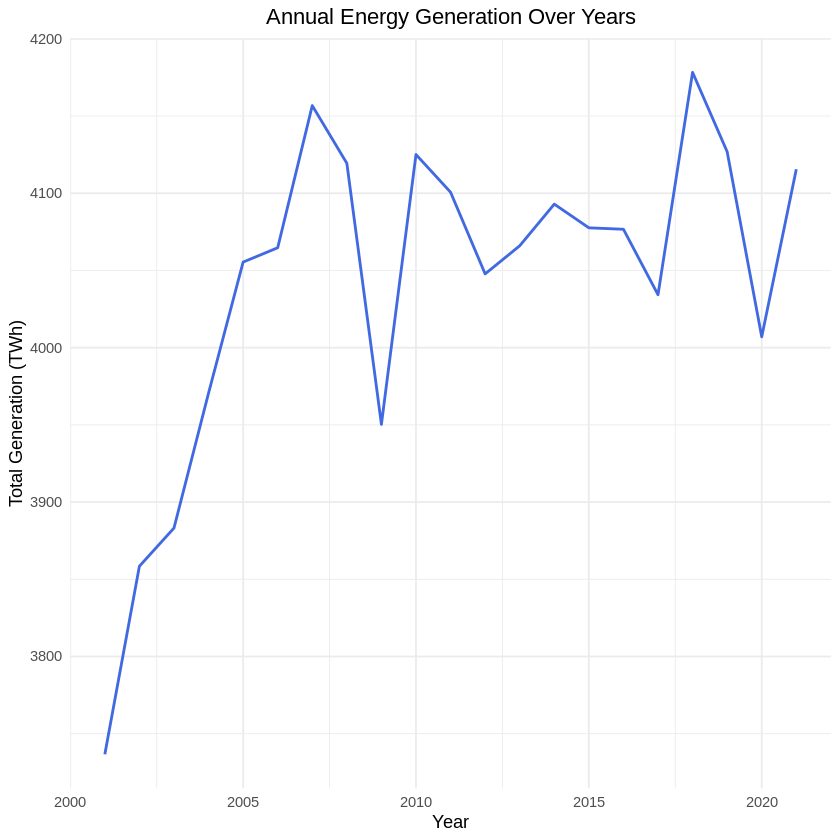

In [12]:
# Trend of total renewable energy generation over the years
generation %>%
  group_by(YEAR) %>%
  filter(YEAR != 2022) %>%
  summarise(total_generation_TWh = sum(generation_TWh)) %>%
  ggplot(aes(x = YEAR, y = total_generation_TWh)) +
  geom_line(color = "royalblue", size = 0.8) +
  labs(title = "Annual Energy Generation Over Years",
       x = "Year", y = "Total Generation (TWh)") +
  theme_minimal() + theme(plot.title = element_text(hjust = 0.5))


The energy generated showed a consistent increase from 2001 to 2007, with a
slight dip in 2008. In 2009, the lowest energy generation was recorded compared to other years. Notably, 2018 witnessed the highest energy generation within the 21-year time frame.







 -   How has the overall renewable power generation evolved over the years? In comparison to nonrenewable power generation?

`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.


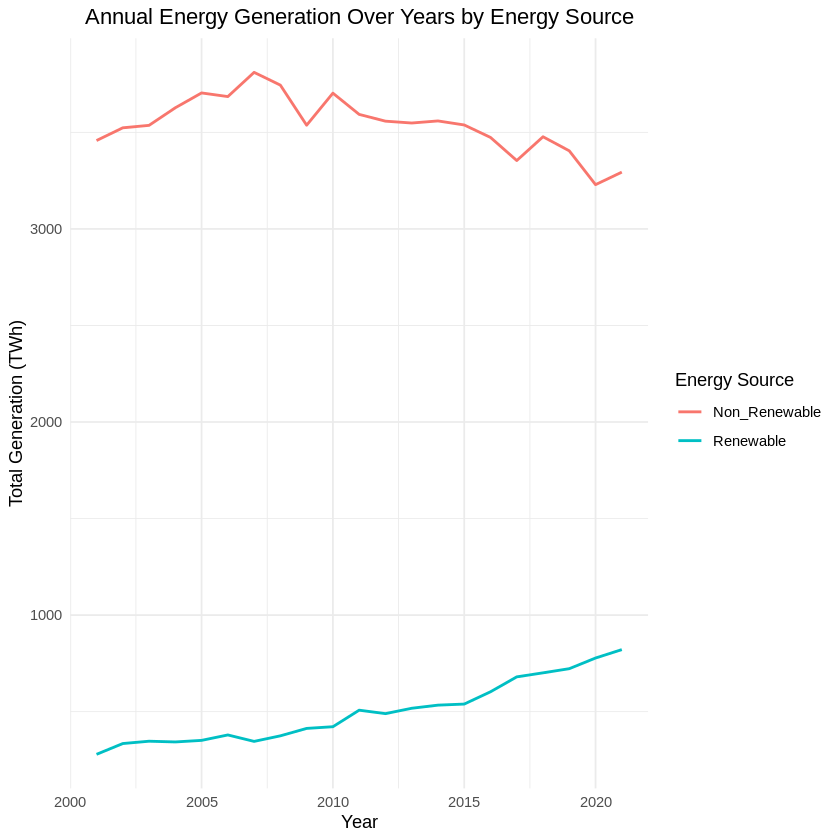

In [13]:
# Trend of renewable and non-renewable energy generation over the years
generation %>%
  group_by(YEAR, type_of_energy_source) %>%
  filter(YEAR != 2022) %>%
  summarise(total_generation_TWh = sum(generation_TWh)) %>%
  ggplot(aes(x = YEAR, y = total_generation_TWh, color = type_of_energy_source)) +
  geom_line(size = 0.8) +
  labs(title = "Annual Energy Generation Over Years by Energy Source",
       x = "Year", y = "Total Generation (TWh)", color = "Energy Source") +
  theme_minimal() + theme(plot.title = element_text(hjust = 0.5))


Renewable energy generation is on the rise as the country gradually shifts towards green energy, while non-renewable energy generation is gradually decreasing. This reflects the country's commitment to green energy resolution.


*2. Energy Type Comparison*


-   what is the total generation of different types of renewable energy sources?

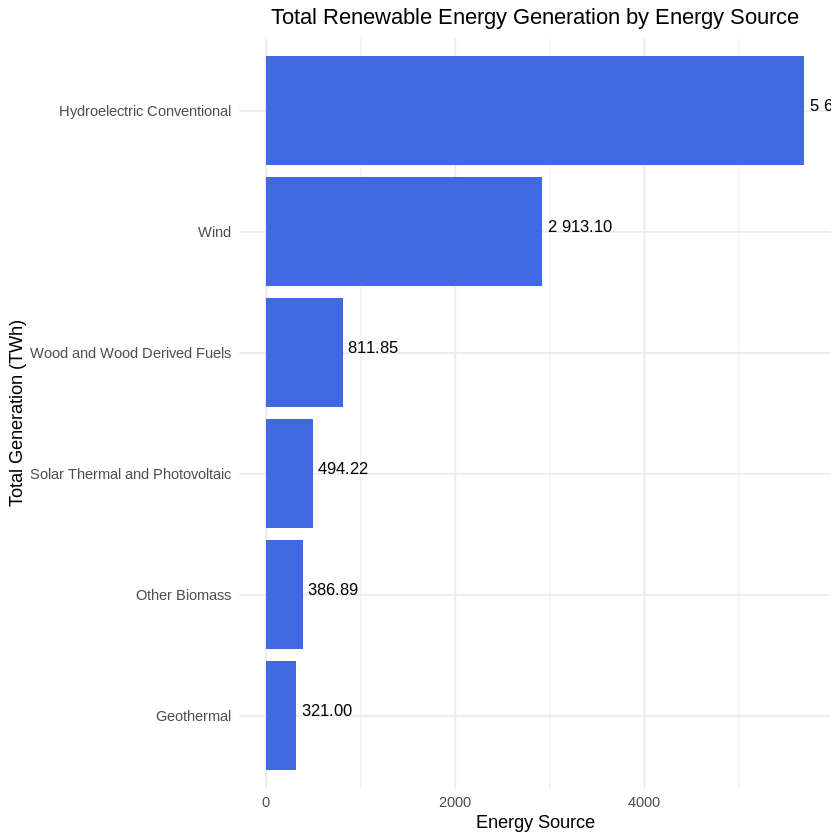

In [14]:
# Total renewable energy generation by energy source (excluding Pumped Storage)
renewable <- generation %>%
  filter(type_of_energy_source == "Renewable", YEAR != 2022, ENERGY_SOURCE != "Pumped Storage")

# Bar plot of total renewable energy generation by energy source
renewable %>%
  group_by(ENERGY_SOURCE) %>%
  summarise(total_generation = sum(generation_TWh)) %>%
  arrange(desc(total_generation)) %>%
  ggplot(aes(x = reorder(ENERGY_SOURCE, total_generation), y = total_generation)) +
  geom_col(fill = "royalblue") + coord_flip() +
  geom_text(aes(label = scales::number(total_generation, accuracy = 0.01)),
            hjust = -0.1, vjust = 0, size = 3.5, color = "black") +
  labs(title = "Total Renewable Energy Generation by Energy Source",
       x = "Total Generation (TWh)", y = "Energy Source") +
  theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

Hydroelectric power is the primary renewable energy source, followed by wind. Among the six types of renewable energy sources, geothermal energy contributes the least.

-   How does the contribution of different types of renewable energy sources vary over time? Are certain types of energy sources gaining prominence compared to others?

`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.


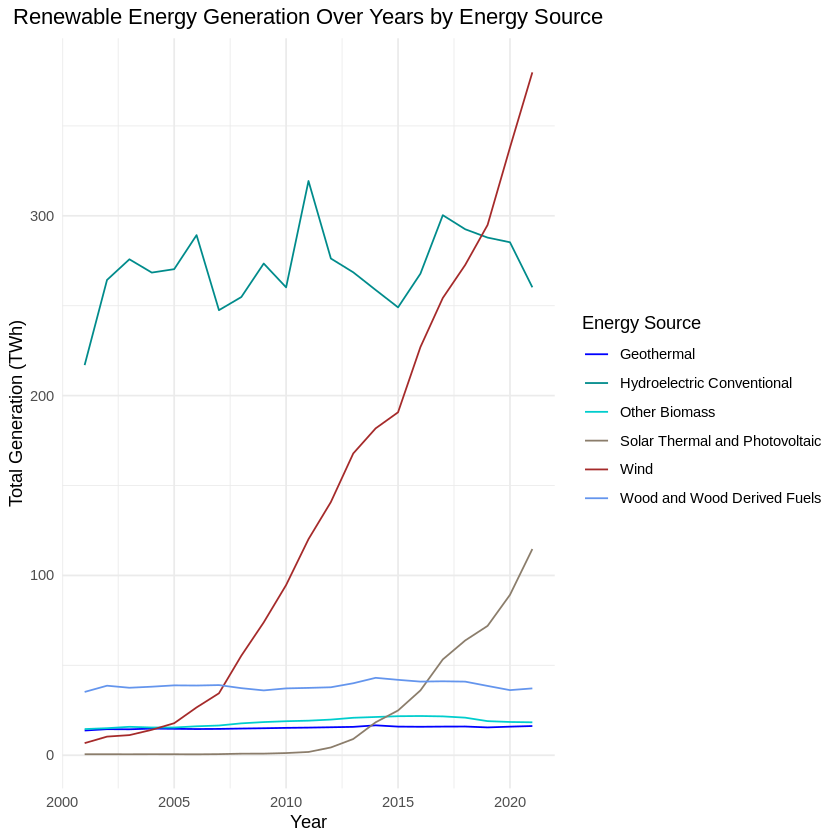

In [15]:
# Line plot of renewable energy generation over the years by energy source
color_palette <- c("blue1", "darkcyan", "cyan3", "bisque4", "brown", "cornflowerblue")
renewable %>%
  group_by(YEAR, ENERGY_SOURCE) %>%
  summarise(total_generation = sum(generation_TWh)) %>%
  ggplot(aes(x = YEAR, y = total_generation, color = ENERGY_SOURCE)) +
  geom_line(size = 0.5) +
  scale_color_manual(values = color_palette) +
  labs(title = "Renewable Energy Generation Over Years by Energy Source",
       x = "Year", y = "Total Generation (TWh)", color = "Energy Source") +
  theme_minimal() + theme(plot.title = element_text(hjust = 0.5))


As the country remains committed to its green energy resolution, the generation of wind energy has significantly surpassed hydroelectric conventional energy production in 2019. Furthermore, the trend indicates a continuous increase in wind energy generation.


*3. Producer Sector Analysis:*


- What is the total energy generated by the type of producer? Is there any noticeable trend?


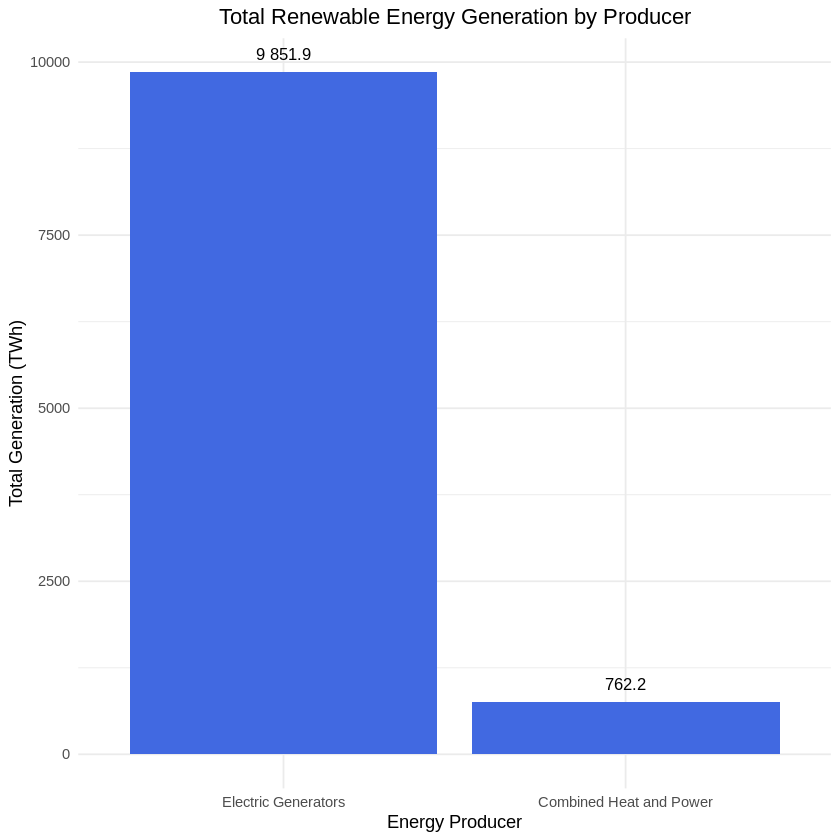

In [16]:
# Total renewable energy generation by energy producer
renewable %>% group_by(energy_producer) %>%
  summarise(total_generation = sum(generation_TWh)) %>%
  ggplot(aes(x = reorder(energy_producer, -total_generation), y = total_generation)) +
  geom_col(fill = "royalblue") +
  geom_text(aes(label = scales::number(total_generation, accuracy = 0.1)),
            hjust = 0.5, vjust = -1, size = 3.5, color = "black") +
  labs(title = "Total Renewable Energy Generation by Producer",
       x = "Energy Producer", y = "Total Generation (TWh)") +
  theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

Electric generators stand as the primary energy producers, generating 9851.9TWh of energy, a significant 92.3% more than the energy produced by combined heat and power.


- What is the sub-sector noticeable trend for the major type of producer?

`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.


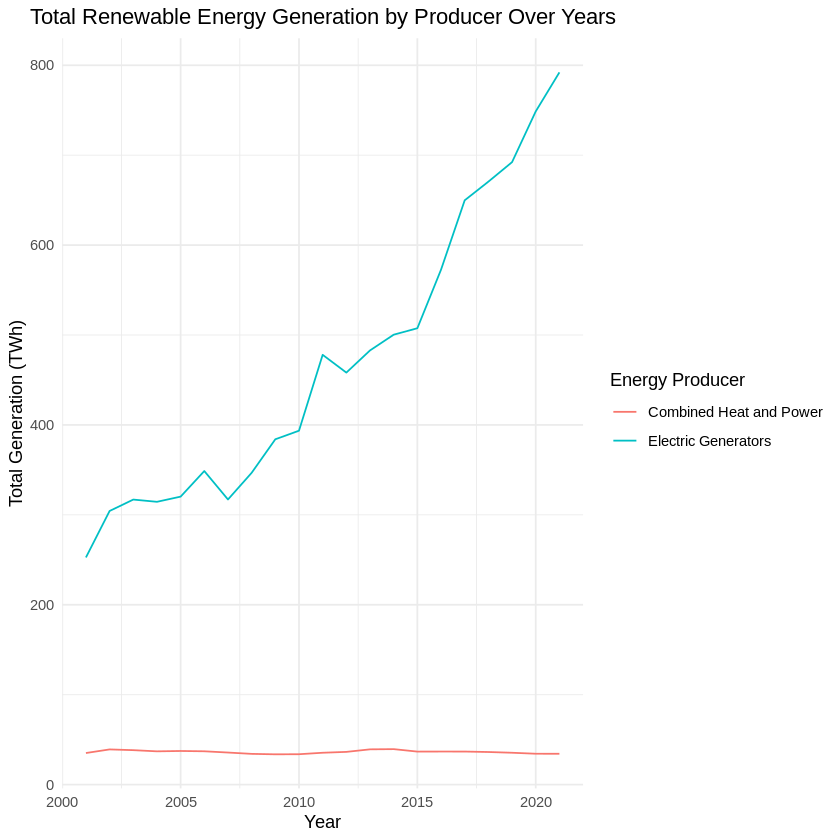

In [17]:
# Trend of total renewable energy generation by energy producer over the years
renewable %>% group_by(YEAR, energy_producer) %>%
  summarise(total_generation = sum(generation_TWh)) %>%
  ggplot(aes(x = YEAR, y = total_generation, color = energy_producer)) +
  geom_line() +
  labs(title = "Total Renewable Energy Generation by Producer Over Years",
       x = "Year", y = "Total Generation (TWh)", color = "Energy Producer") +
  theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

Combined heat and power have consistently maintained steady energy generation over the years, while energy produced by electric generators is on an upward trend.

-
What is the sub-sector noticeable trend for the major type of producer?

`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.


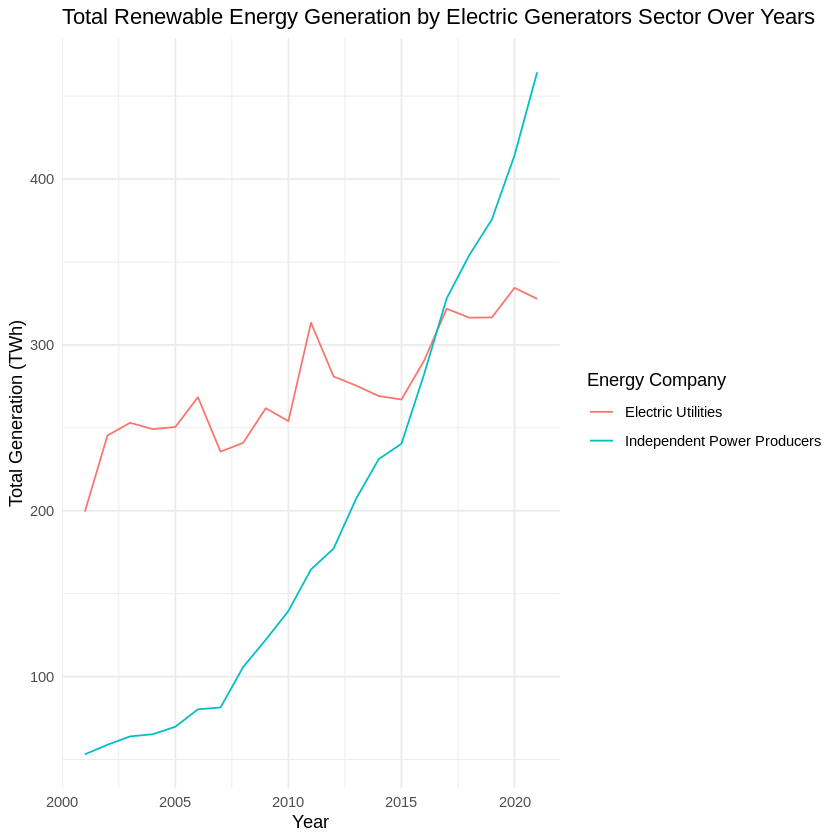

In [18]:
# Total renewable energy generation by energy company for electric generators
renewable %>% group_by(YEAR, energy_company) %>%
  filter(energy_producer == "Electric Generators") %>%
  summarise(total_generation = sum(generation_TWh)) %>%
  ggplot(aes(x = YEAR, y = total_generation, color = energy_company)) +
  geom_line() +
  labs(title = "Total Renewable Energy Generation by Electric Generators Sector Over Years",
       x = "Year", y = "Total Generation (TWh)", color = "Energy Company") +
  theme_minimal()

Electric generators, a key player in the energy producer sector with two sub-sectors, have seen a consistent upward trend in energy generation. Both electric utilities companies and Independent Power Producers have contributed to this growth. Energy generated by Independent Power Producers has increased significantly by 773.6%, while Electric Utilities have shown a respectable increase of 64.32% between 2001 and 2021.

*4. State-wise Analysis:*


- Top 5 states in renewable generation?


Selecting by total_generation


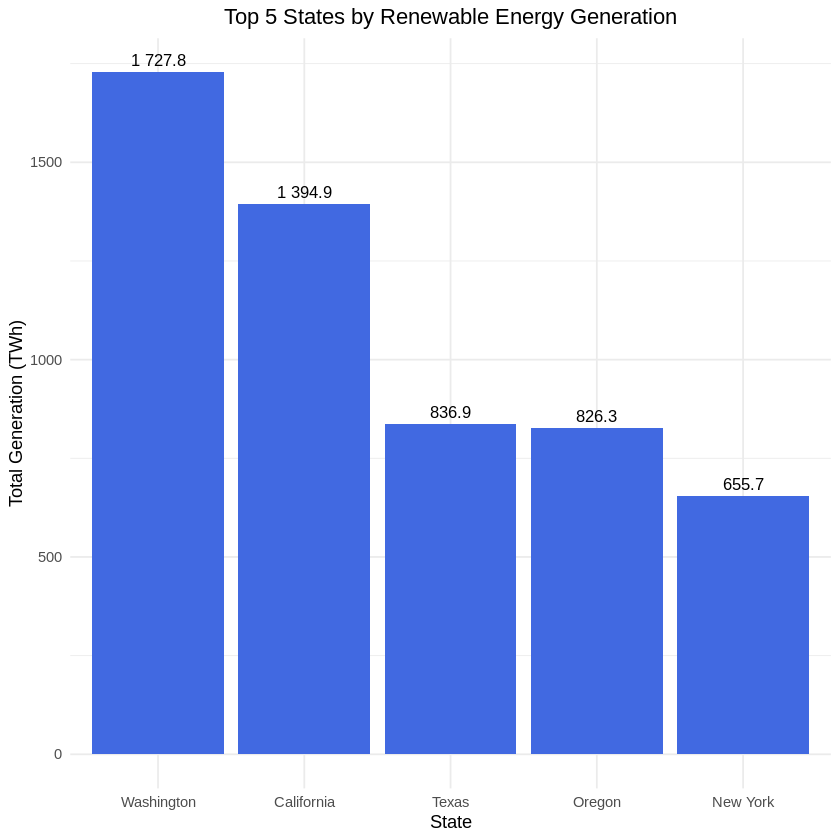

In [19]:
# Top 5 states by renewable energy generation
renewable %>% group_by(State) %>%
  summarise(total_generation = sum(generation_TWh)) %>%
  arrange(desc(total_generation)) %>% top_n(5) %>%
  ggplot(aes(x = reorder(State, -total_generation), y = total_generation)) +
  geom_col(fill = "royalblue") +
  labs(title = "Top 5 States by Renewable Energy Generation",
       x = "State", y = "Total Generation (TWh)") +
  geom_text(aes(label = scales::number(total_generation, accuracy = 0.1)),
            hjust = 0.5, vjust = -0.5, size = 3.5, color = "black") +
  theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

Washington state has emerged as the leading generator of renewable energy, contributing a total of 1727.84TWh. This accounts for 16.28% of the total energy generated between 2001 and 2021.

- What are the trends in renewable power generation for each of the top states? Are there states that stand out in terms of consistent growth or fluctuations?


`summarise()` has grouped output by 'YEAR'. You can override using the
`.groups` argument.


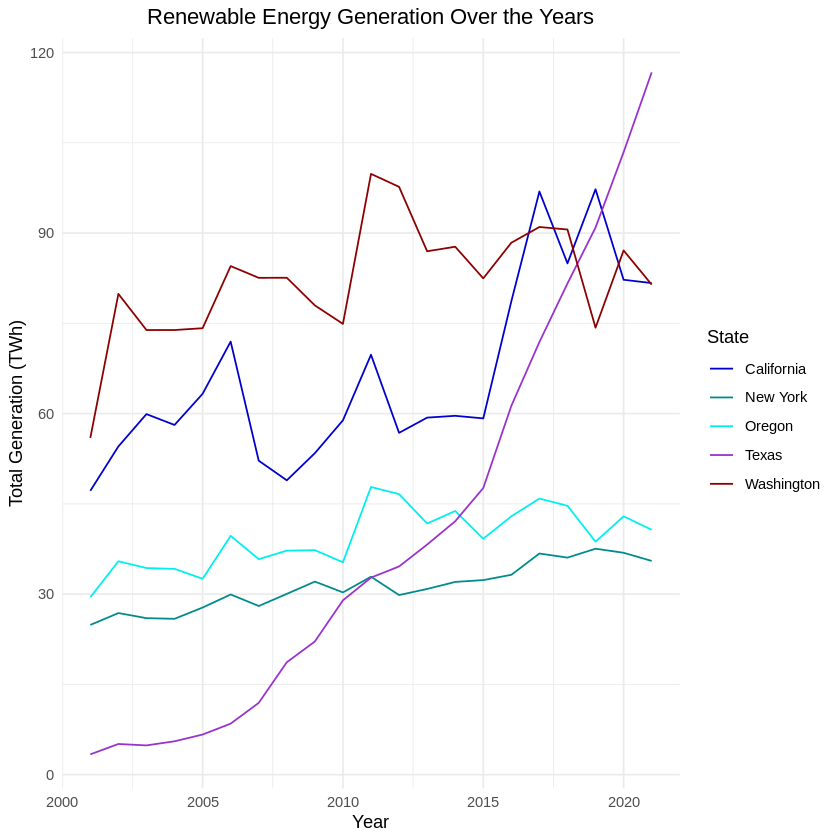

In [20]:
# Trend of renewable energy generation over the years by state
renewable_summary <- renewable %>% group_by(YEAR, State) %>%
  summarise(total_generation = sum(generation_TWh)) %>%
  arrange(desc(total_generation)) %>%
  filter(State %in% c("Washington", "Texas", "Oregon", "New York",
                      "California"))

color_palette3 <- c("blue3", "darkcyan", "cyan2", "darkorchid","darkred")
ggplot(renewable_summary, aes(x = YEAR, y = total_generation, color = State)) +
  geom_line() +
  scale_color_manual(values = color_palette3) +
  labs(title = "Renewable Energy Generation Over the Years",
       x = "Year", y = "Total Generation (TWh)") +
  theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

Renewable energy is experiencing substantial growth in Texas, with a remarkable increase of 3352.67% between 2001 and 2021. Notably, Texas surpassed both Washington and California in energy generation in 2020.

- What is the major renewable generation source for each of the top states?

`summarise()` has grouped output by 'State'. You can override using the
`.groups` argument.


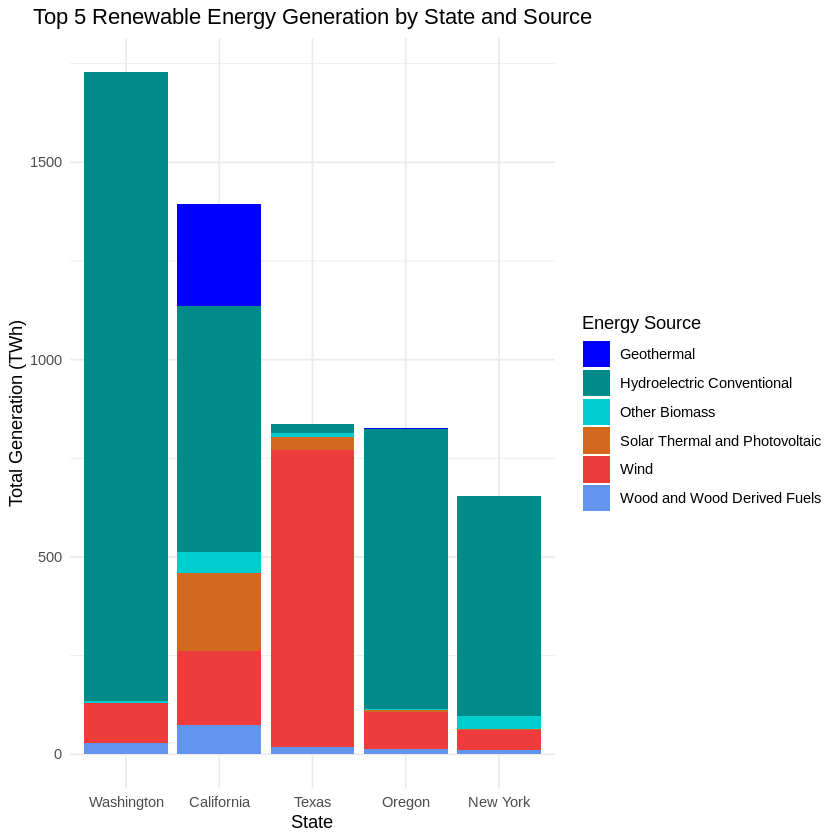

In [21]:
# Top 5 renewable energy generation by state and source
color_palette2 <- c("blue1", "darkcyan", "cyan3", "chocolate", "brown2", "cornflowerblue")
renewable %>% group_by(State, ENERGY_SOURCE) %>%
  summarise(total_generation = sum(generation_TWh)) %>%
  arrange(desc(total_generation)) %>%
  filter(State %in% c("Washington", "Texas", "Oregon", "New York",
                      "California")) %>%
  ggplot(aes(x = reorder(State, -total_generation), y = total_generation, fill = ENERGY_SOURCE)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = color_palette2) +
  labs(title = "Top 5 Renewable Energy Generation by State and Source",
       x = "State", y = "Total Generation (TWh)",
       fill = "Energy Source") +
  theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

Hydroelectric conventional stands as the primary renewable energy source in Washington, California, Oregon, and New York. Texas relies predominantly on wind energy, while California demonstrates a diversified approach by generating energy from all six renewable sources.